In [41]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display, HTML

In [2]:
def map_to_conference(team):
    conferences = {
        'ATL': 'Eastern',
        'BOS': 'Eastern',
        'BKN': 'Eastern',
        'CHA': 'Eastern',
        'CHI': 'Eastern',
        'CLE': 'Eastern',
        'DAL': 'Western',
        'DEN': 'Western',
        'DET': 'Eastern',
        'GSW': 'Western',
        'HOU': 'Western',
        'IND': 'Eastern',
        'LAC': 'Western',
        'LAL': 'Western',
        'MEM': 'Western',
        'MIA': 'Eastern',
        'MIL': 'Eastern',
        'MIN': 'Western',
        'NOP': 'Western',
        'NYK': 'Eastern',
        'OKC': 'Western',
        'ORL': 'Eastern',
        'PHI': 'Eastern',
        'PHX': 'Western',
        'POR': 'Western',
        'SAC': 'Western',
        'SAS': 'Western',
        'TOR': 'Eastern',
        'UTA': 'Western',
        'WAS': 'Eastern',
    }

    return conferences.get(team, 'Unknown')

In [3]:
current_directory = os.getcwd()
detailed_players = 'nba2021_per_game.csv'
detailed_advanced = 'nba2021_advanced.csv'
motion_detail = 'player_metrics_open.csv'
motion_path = 'path_detail_open.csv'


playersDet = 'PlayerDetails'
open_motion = 'Open'

In [4]:
file_path_det = os.path.join(current_directory,playersDet,detailed_players)
file_path_motion = os.path.join(current_directory,open_motion,motion_detail)
file_path_advanced = os.path.join(current_directory,playersDet,detailed_advanced)
file_motion_path = os.path.join(current_directory,open_motion,motion_path)

df_detailed = pd.read_csv(file_path_det)
df_motion = pd.read_csv(file_path_motion)
df_advanced = pd.read_csv(file_path_advanced)
df_motion_path = pd.read_csv(file_motion_path)

In [5]:
df_motion['FullName'] = df_motion['fnm'] + ' ' + df_motion['lnm']
df_motion_path['FullName'] = df_motion_path['fnm'] + ' ' + df_motion_path['lnm']
df_motion = df_motion.drop(columns=['fnm', 'lnm'], axis=1)

merged_df1 = pd.merge(df_detailed, df_advanced, right_on=['Player','Tm'], left_on=['Player','Tm'], how='inner', suffixes=('', '_df2'))
idx = merged_df1.groupby('Player')['G'].idxmax()
merged_df1 = merged_df1.loc[idx]
merged_df2 = pd.merge(merged_df1, df_motion, right_on='FullName', left_on='Player', how='inner')
merged_df = pd.merge(merged_df1, df_motion_path, right_on='FullName', left_on='Player', how='inner')
merged_df['Team'] = merged_df['Tm']
merged_df['Conference'] = merged_df['Team'].apply(map_to_conference)

column_order = ['Player', 'Pos', 'Team', 'Age','hght','n','G','MP','USG%','FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'TS%','bx', 'by', 'bz', 'rt', 'rx', 'ry', 'rz', 'rv', 'rvx', 'rvy', 'rvz', 'mnv', 'mnvt', 'mnvx', 'mnvy', 'mnvz', 'mxv', 'mxvt', 'mxvx', 'mxvy', 'mxvz', 'ta1t', 'ta1x', 'ta1y', 'ta1z', 'ta2t', 'ta2x', 'ta2y', 'ta2z', 'at1t', 'at1x', 'at1y', 'at1z', 'at2t', 'at2x', 'at2y', 'at2z', 'lr1t', 'lr1x', 'lr1y', 'lr1z', 'lr2t', 'lr2x', 'lr2y', 'lr2z', 'rl1t', 'rl1x', 'rl1y', 'rl1z', 'rl2t', 'rl2x', 'rl2y', 'rl2z', 'pl', 'spl', 'plr']  

#### Executable for data analysis

In [6]:
merged_df['Pos'] = merged_df['Pos'].replace({'PG': 'G', 'SG': 'G', 'SF': 'F', 'PF': 'F', 'F-C': 'C', 'SF-PF': 'F'})

In [7]:
unique_values = merged_df['Pos'].unique()

print("Unique values in the column:")
print(unique_values)

Unique values in the column:
['F' 'G' 'C']


### Heatmap

In [8]:
heatmap = merged_df.loc[merged_df.Pos.isin(['G','F', 'C']), ['Pos','FT%','2P%','3P%','FG%','TS%']].groupby('Pos').mean()
print(heatmap)

          FT%       2P%       3P%       FG%       TS%
Pos                                                  
C    0.693930  0.422069  0.382266  0.462929  0.595033
F    0.738949  0.480074  0.403592  0.480169  0.604410
G    0.798548  0.485682  0.375681  0.439013  0.567117


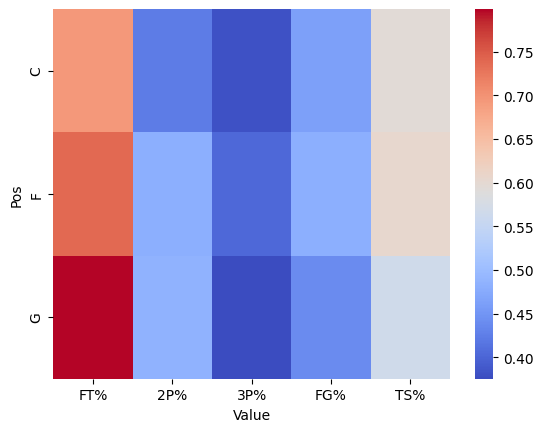

In [9]:
sns.heatmap(heatmap, cmap='coolwarm')
plt.xlabel('Value')
plt.ylabel('Pos')
plt.show()

### Histogram of FGA

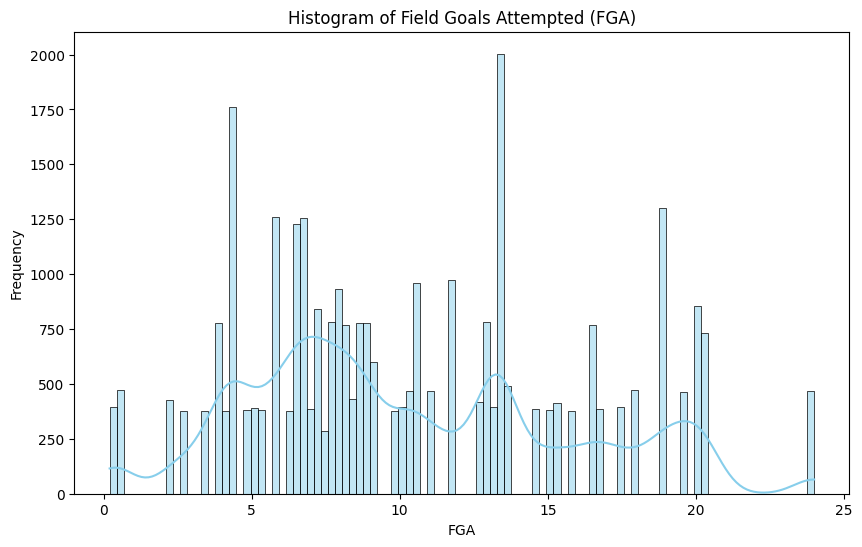

In [10]:
fga_data = merged_df['FGA']
plt.figure(figsize=(10, 6))
sns.histplot(fga_data, bins=100, kde=True, color='skyblue')
plt.title('Histogram of Field Goals Attempted (FGA)')
plt.xlabel('FGA')
plt.ylabel('Frequency')
plt.show()

pagal sita matome, jog duomenys galima klasterizuoti i tris grupes pagal ismestu metimu kieki ir taip atlikti analize pagal tai kaip daznai zaidejas mesdavo per rungtynes. Tai bus lyg atspindys, kuris leis susidaryti geresni vaizda apie metimo technikos efektyvuma, kadangi mazai metantys zaidejai gali tureti gerus procentus del mazo duomenu kiekio. Taip pat tai gal leis pastebeti, koks feature galetu buti isskirtas kaip skiriamasis bruozas sudaryti sias grupes ir galbut kaip klasteriai jie pasizymes tam tikromis savybemis, budingomis tik tam tikra metimu kieki atliekantiems zaidejams (panasi trajektorija, panasus pataikymo procentai is tam tikru distanciju)

In [11]:
def categorize_fga(fga):
    if fga <= 10:
        return 1
    elif 10 < fga <= 18:
        return 2
    else:
        return 3

# Apply the function to create a new column 'fga_category'
merged_df['fga_category'] = merged_df['FGA'].apply(categorize_fga)

### Histogram of release time

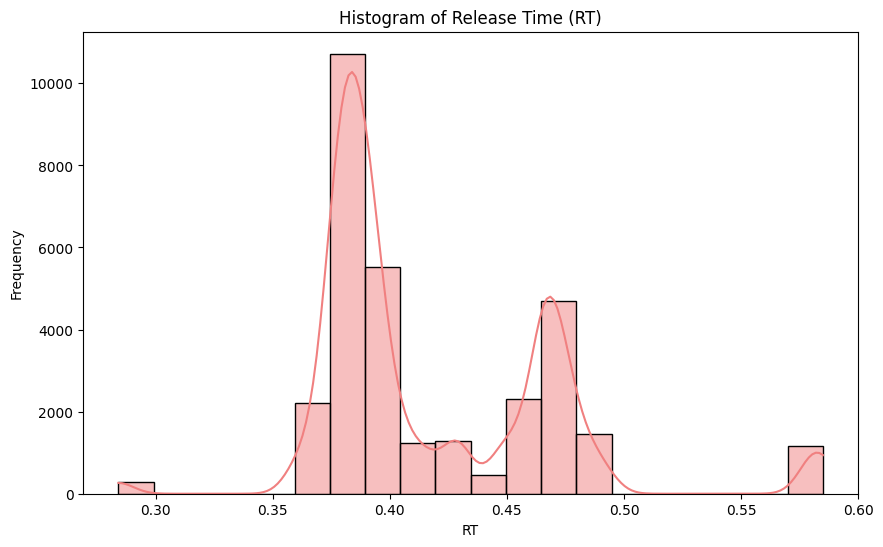

In [12]:
rt_data = merged_df['rt'] * -1 

plt.figure(figsize=(10, 6))
sns.histplot(rt_data, bins=20, kde=True, color='lightcoral')
plt.title('Histogram of Release Time (RT)')
plt.xlabel('RT')
plt.ylabel('Frequency')
plt.show()


Siame grafike vel matome, jog galima iskirti dvi grupes, tai viena, kurioje ismetimo greitis didesnis nei 0.37 (apytiksle skilimo reiksme) ir tuos kurie ismeta greiciau.

In [13]:
def categorize_rt(rt):
    if rt >= -0.37:
        return 1
    else:
        return 2

merged_df['rt_category'] = merged_df['rt'].apply(categorize_rt)

### Heatmap based on newly created groups 

In [14]:
heatmap_rt = merged_df.loc[merged_df.rt_category.isin([1,2]), ['rt_category','FT%','2P%','3P%','FG%','TS%']].groupby('rt_category').mean()
print(heatmap_rt)

                  FT%       2P%       3P%       FG%       TS%
rt_category                                                  
1            0.801675  0.534089  0.381349  0.451375  0.583472
2            0.767924  0.478694  0.387789  0.457408  0.583911


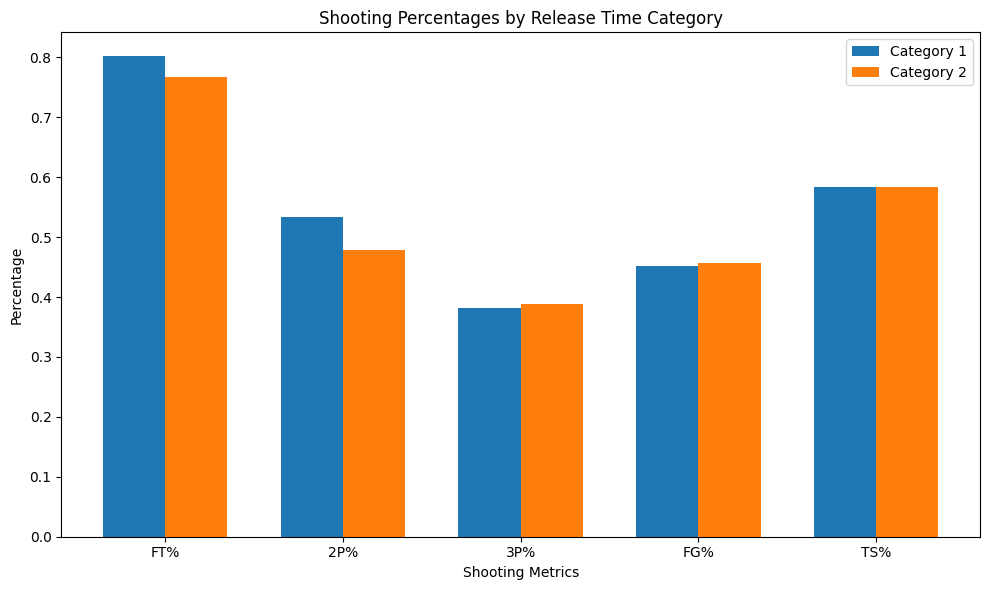

In [83]:
def create_grouped_bar_plot():
    categories = heatmap_rt.index
    metrics = heatmap_rt.columns
    
    bar_width = 0.35
    index = np.arange(len(metrics))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, category in enumerate(categories):
        ax.bar(index + i * bar_width, heatmap_rt.loc[category], bar_width, label=f'Category {category}')
    
    ax.set_xlabel('Shooting Metrics')
    ax.set_ylabel('Percentage')
    ax.set_title('Shooting Percentages by Release Time Category')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Create the grouped bar plot
create_grouped_bar_plot()

In [15]:
heatmap_fga = merged_df.loc[merged_df.fga_category.isin([1,2,3]), ['fga_category','2P%','3P%','FG%','TS%']].groupby('fga_category').mean()
print(heatmap_fga)

                   2P%       3P%       FG%       TS%
fga_category                                        
1             0.454068  0.397188  0.453660  0.584353
2             0.496410  0.364745  0.447809  0.567109
3             0.557868  0.406347  0.499530  0.628075


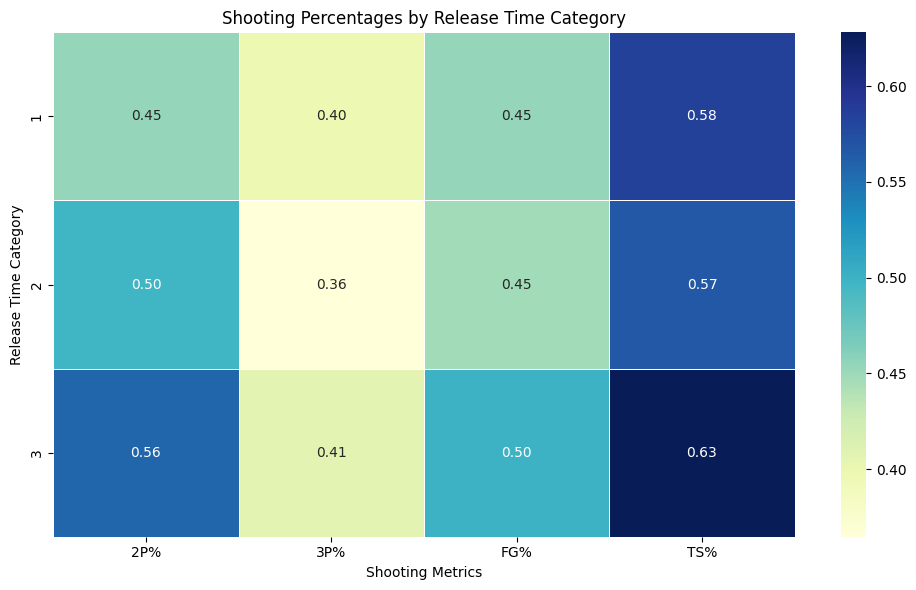

In [108]:
def create_heatmap():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(heatmap_fga, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax, linewidths=.5)
    
    ax.set_xlabel('Shooting Metrics')
    ax.set_ylabel('Release Time Category')
    ax.set_title('Shooting Percentages by Release Time Category')

    plt.tight_layout()
    plt.show()

# Create the heatmap
create_heatmap()

padaryti grafikus su pataikymais ir tada jiems uzdeti kategorijas pagal ismestus metimus

simple shooting form

In [107]:
def update_plot(player):
    player_data = merged_df[merged_df['FullName'] == player]
    x_coordinates = player_data['cx']
    y_coordinates = player_data['cy']
    z_coordinates = player_data['cz']
    
    # Get the shooting percentages
    three_p_percent = player_data['3P%'].iloc[0]
    fg_percent = player_data['FG%'].iloc[0]
    two_p_percent = player_data['2P%'].iloc[0]

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create 1 row and 2 columns of subplots
    
    # Plot cz vs cx
    axs[0].plot(x_coordinates, z_coordinates, marker='o', linestyle='', color='g')
    axs[0].set_title(f'Shooting motion horizontally for {player}')
    axs[0].set_xlim(-2, 2)
    axs[0].set_ylim(0, 10)
    axs[0].grid(True)
    axs[0].set_xticklabels([])
    axs[0].set_yticklabels([])

    # Plot cz vs cy
    axs[1].plot(x_coordinates, y_coordinates, marker='o', linestyle='', color='g')
    axs[1].set_title(f'Shooting motion from above for {player}')
    axs[1].set_xlim(-2, 2)
    axs[1].set_ylim(-2, 2)
    axs[1].grid(True)
    axs[1].set_xticklabels([])
    axs[1].set_yticklabels([])

    # Add text annotations for shooting percentages using text boxes
    textstr = '\n'.join((
        f'3P%: {three_p_percent*100:.2f}%',
        f'FG%: {fg_percent*100:.2f}%',
        f'2P%: {two_p_percent*100:.2f}%'
    ))

    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # Place a text box in upper left in axes coords
    axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting a player
player_dropdown = widgets.Dropdown(
    options=merged_df['FullName'].unique(),
    description='Player:',
    value='Kevin Durant'
)

# Use the interactive function to update the plot
interactive_plot = widgets.interactive(update_plot, player=player_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Player:', index=37, options=('Al-Farouq Aminu', 'Andre Iguodala', …

In [81]:
player1_dropdown = widgets.Dropdown(
    options=merged_df['FullName'].unique(),
    description='Player 1',
    value='Kevin Durant'
)

player2_dropdown = widgets.Dropdown(
    options=merged_df['FullName'].unique(),
    description='Player 2',
    value='Bradley Beal'
)

player3_dropdown = widgets.Dropdown(
    options=merged_df['FullName'].unique(),
    description='Player 3',
    value='Stephen Curry'
)

def update_plot(player1, player2, player3):
    players = [player1, player2, player3]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
    player_data = {}
    for i, player in enumerate(players):
        player_df = merged_df[merged_df['FullName'] == player]
        x_coordinates = player_df['cx']
        y_coordinates = player_df['cz']
        release_time = player_df['rt'].iloc[0] * -1 
        player_data[player] = (x_coordinates, y_coordinates, release_time)
        
        ax = axes[i]
        ax.plot(x_coordinates, y_coordinates, marker='o', linestyle='', color='grey')
        ax.set_title(f'Shooting Motion: {player}')
        ax.set_xlim(-2, 2)
        ax.set_ylim(2, 10)
        ax.grid(True)

        ax.text(1.8, 9.5, f'Release Time: {release_time:.2f}s', fontsize=12, color='blue', ha='right', bbox=dict(facecolor='white', alpha=0.6, edgecolor='blue'))

    bubbles = [ax.plot([], [], 'ro')[0] for ax in axes]

    def animate(frame):
        for i, player in enumerate(players):
            x, y, release_time = player_data[player]
            speed = len(x) / (100 * release_time) 
            position = int((frame * speed) % len(x))
            bubbles[i].set_data(x.iloc[position], y.iloc[position])
            bubbles[i].set_markersize(15 + 10 * np.sin(2 * np.pi * frame / len(x)))  
        return bubbles
    
    ani = FuncAnimation(fig, animate, frames=200, interval=100, blit=True)

    display(HTML(ani.to_jshtml()))
    plt.tight_layout()
    plt.show()
    
interactive_plot = widgets.interactive(update_plot, player1=player1_dropdown, player2=player2_dropdown, player3=player3_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Player 1', index=37, options=('Al-Farouq Aminu', 'Andre Iguodala',…

In [89]:
selected_columns = merged_df[['FullName', 'cx', 'cz', 'rt_category']]

row_counts = selected_columns.groupby('FullName').size().reset_index(name='Counts')

print(row_counts)

           FullName  Counts
0   Al-Farouq Aminu     473
1    Andre Iguodala     473
2     Austin Rivers     363
3     Avery Bradley     400
4      Ben McLemore     387
..              ...     ...
72   Victor Oladipo     395
73  Wayne Ellington     469
74  Wesley Matthews     378
75      Will Barton     393
76      Zach LaVine     465

[77 rows x 2 columns]


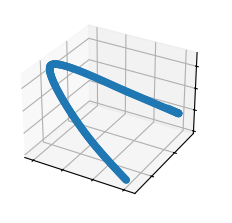

In [115]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

datatest3d = player_df = merged_df[merged_df['FullName'] == 'Stephen Curry']
xs = datatest3d['cx']
ys = datatest3d['cz']
zs = datatest3d['cy']

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()